<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/modulemain_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set(font_scale=1.1)
from google.colab import files

In [92]:
df = pd.read_csv('/content/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [93]:
df.shape

(918, 12)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [96]:
#from numpy._core import numeric
#Terget & Features
target_col ='HeartDisease'
numeric_col =['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak',]

cetagorical_col =['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

print(f'Target column is {target_col}')
print(f'Numeric columns are {numeric_col}')
print(f'Cetagorical columns are{cetagorical_col}')

Target column is HeartDisease
Numeric columns are ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Cetagorical columns are['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [97]:
#missing value check count per col
#df.isna().sum()
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [98]:
# look at some basic value range / just numerical value
df[numeric_col].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [99]:
# sob ghula cetagorical value jonno unice value dekhbo ei jonno amra for chalabo
for c in cetagorical_col:
  print(f'Unique value in {c} is {df[c].unique()}')

Unique value in Sex is ['M' 'F']
Unique value in ChestPainType is ['ATA' 'NAP' 'ASY' 'TA']
Unique value in RestingECG is ['Normal' 'ST' 'LVH']
Unique value in ExerciseAngina is ['N' 'Y']
Unique value in ST_Slope is ['Up' 'Flat' 'Down']


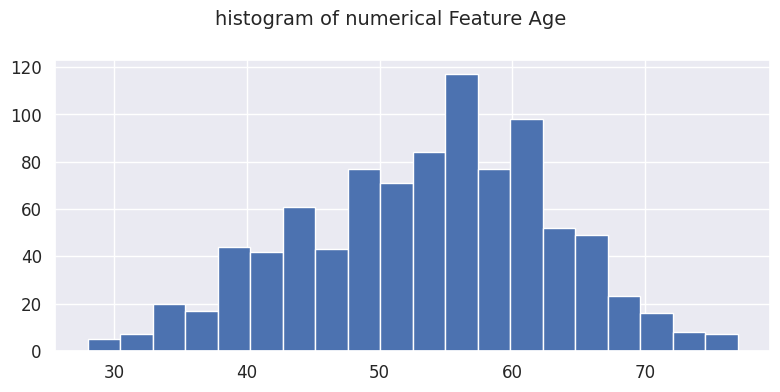

In [100]:
#His for numeric feature
df['Age'].hist(bins=20,figsize=(8,4))
plt.suptitle('histogram of numerical Feature Age',fontsize=14)
plt.tight_layout()
plt.show()

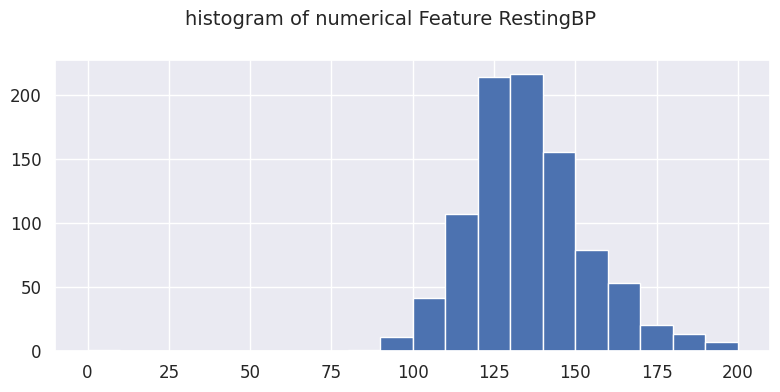

In [101]:
df['RestingBP'].hist(bins=20,figsize=(8,4))
plt.suptitle('histogram of numerical Feature RestingBP',fontsize=14)
plt.tight_layout()
plt.show()

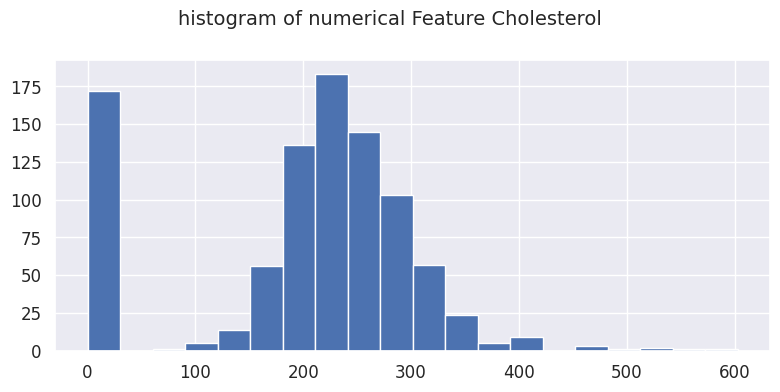

In [102]:
df['Cholesterol'].hist(bins=20,figsize=(8,4))
plt.suptitle('histogram of numerical Feature Cholesterol',fontsize=14)
plt.tight_layout()
plt.show()

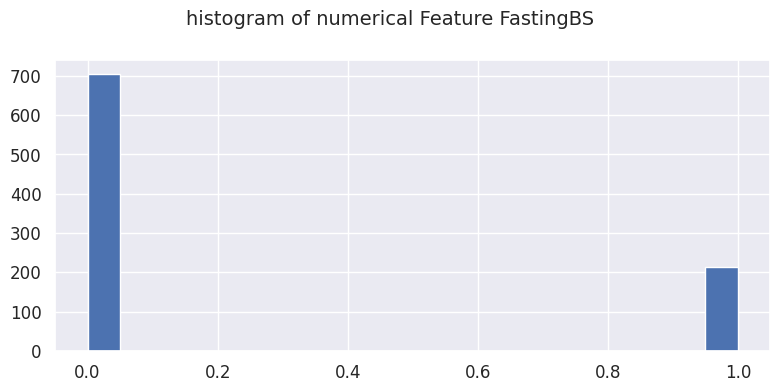

In [103]:
df['FastingBS'].hist(bins=20,figsize=(8,4))
plt.suptitle('histogram of numerical Feature FastingBS',fontsize=14)
plt.tight_layout()
plt.show()

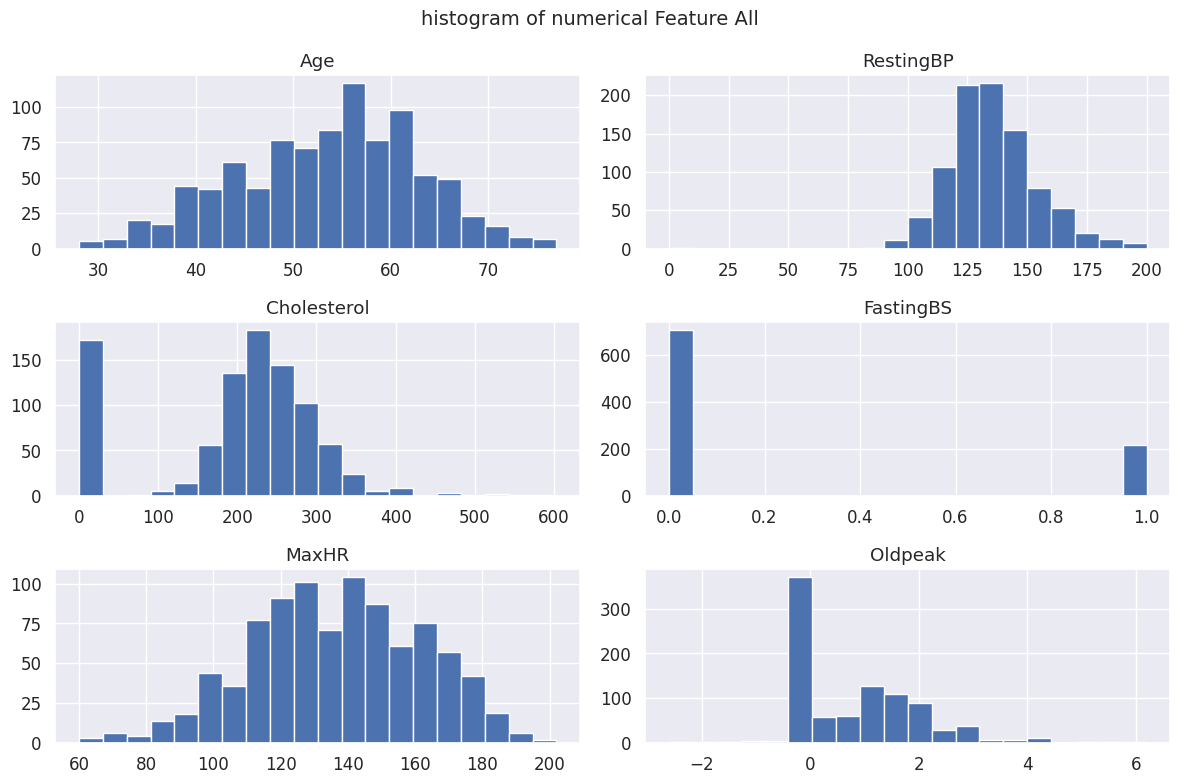

In [104]:
# sob ghula ek sathe dekhbo numerical
df[numeric_col].hist(bins=20,figsize=(12,8))
plt.suptitle('histogram of numerical Feature All',fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

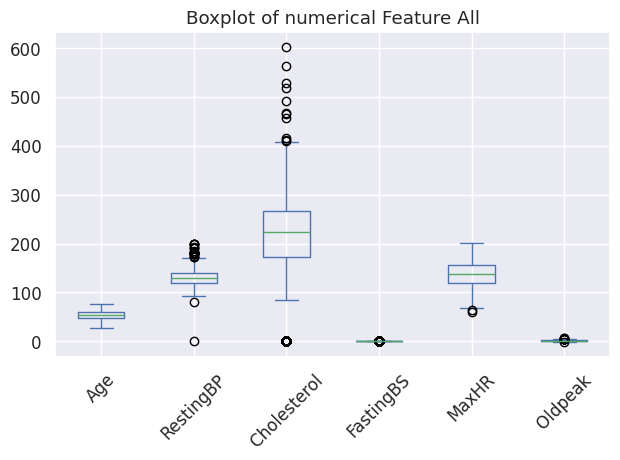

In [105]:
#Boxplot
plt.figure(figsize=(12,8))
#sns.boxplot(data=df[numeric_col])
df[numeric_col].plot(kind='box')
plt.title('Boxplot of numerical Feature All')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

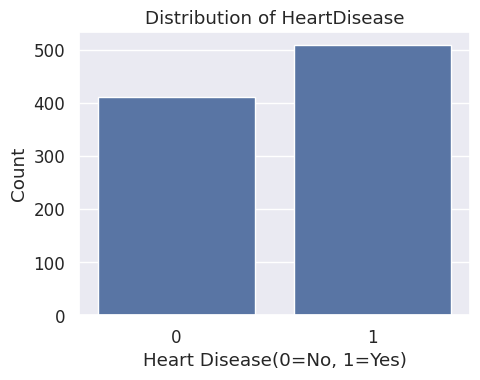

In [106]:
# Terget value Distribution and class imblance
plt.figure(figsize=(5,4))
#sns.countplot(x=df[target_col],data=df)
sns.countplot(x=df[target_col])
plt.title(f'Distribution of {target_col}')
plt.xlabel('Heart Disease(0=No, 1=Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [107]:
df[target_col].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


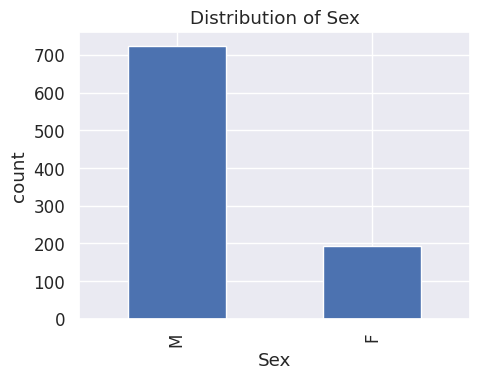

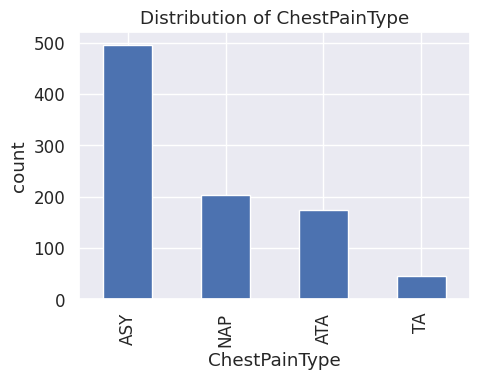

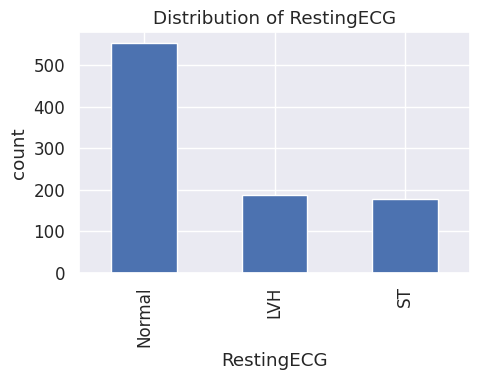

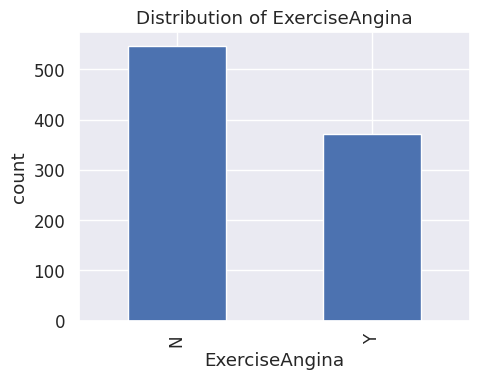

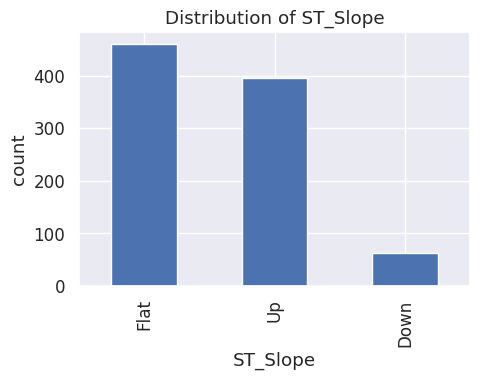

In [108]:
#Cetagorical Feature Explore
for c in cetagorical_col:
 plt.figure(figsize=(5,4))
 df[c].value_counts().plot(kind='bar')
 plt.title(f'Distribution of {c}')
 plt.ylabel('count')
#plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()


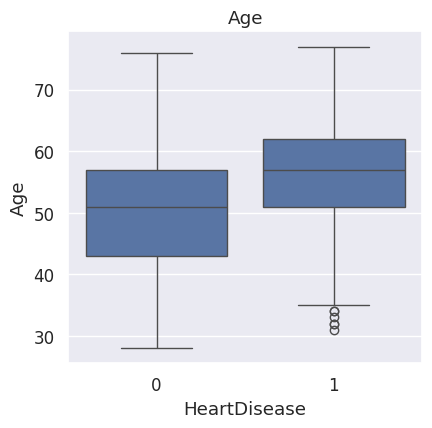

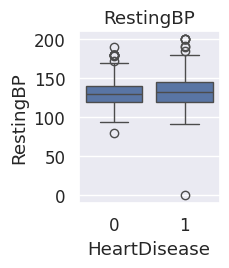

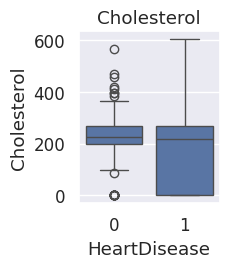

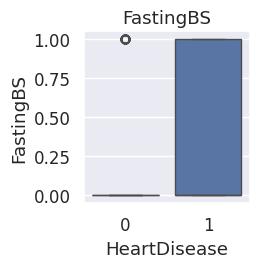

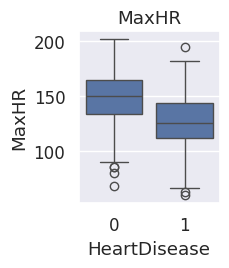

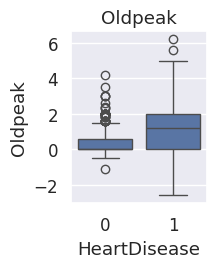

In [110]:
#Boxplot of numerical feature split HeartDisease
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_col,1):
 plt.subplot(2,3,i)
 sns.boxplot(x=df[target_col],y=df[col])
 plt.title(col)
 plt.tight_layout()
 plt.show()

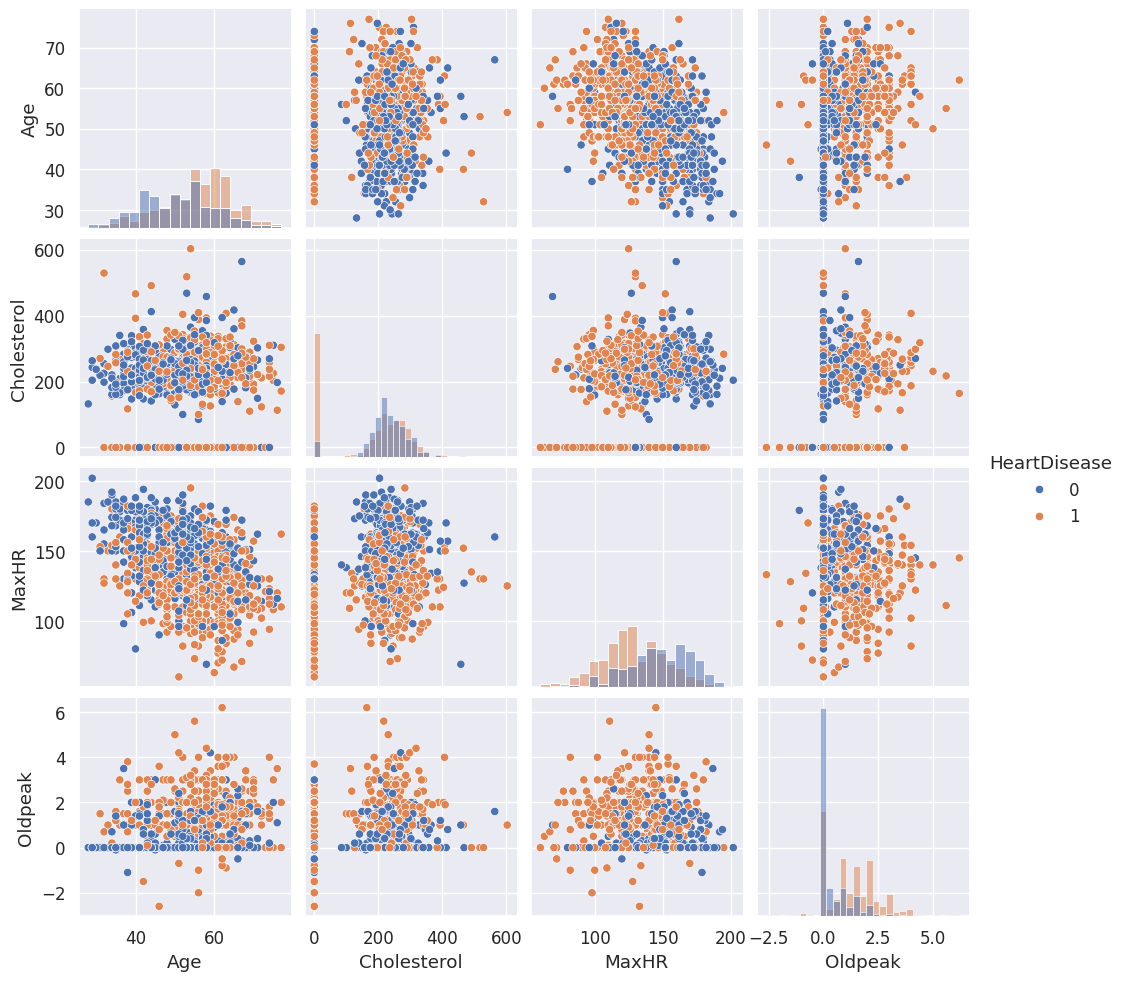

In [111]:
#pairplot for a subset of features
sns.pairplot(df[['Age','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease',diag_kind='hist')
plt.show()

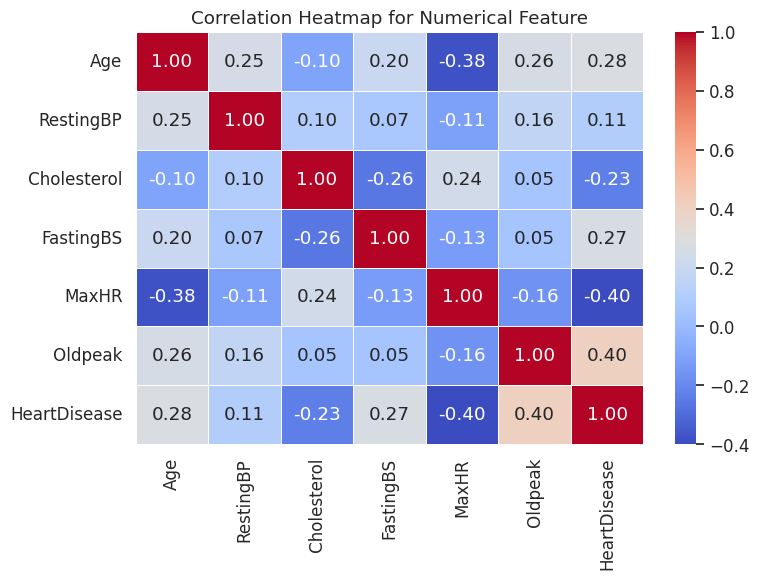

In [116]:
#correlation Matrix and Heatmap
corr_matrix=df[numeric_col + [target_col]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Feature')
plt.tight_layout()
plt.show()

HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


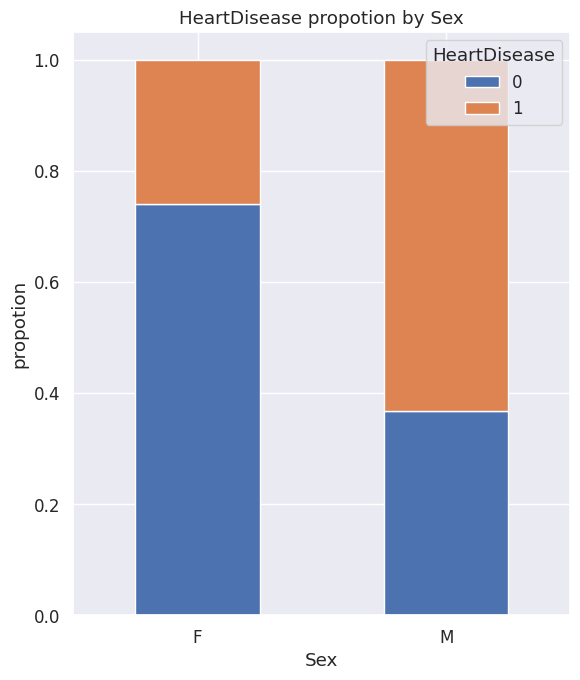

HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


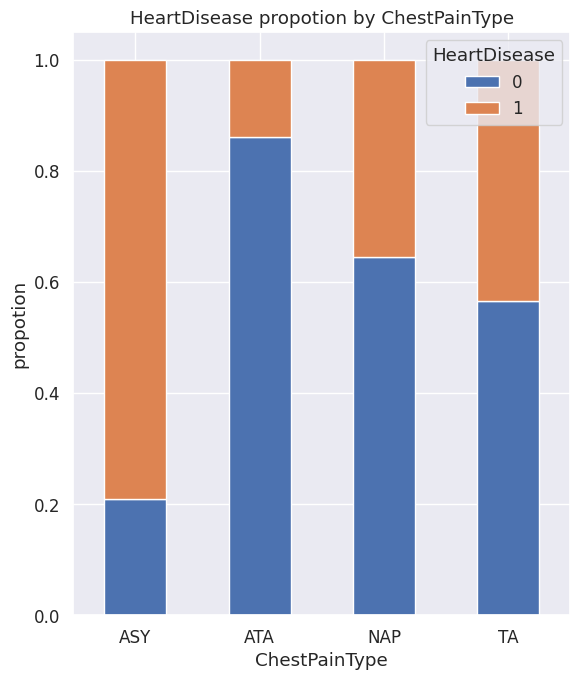

HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


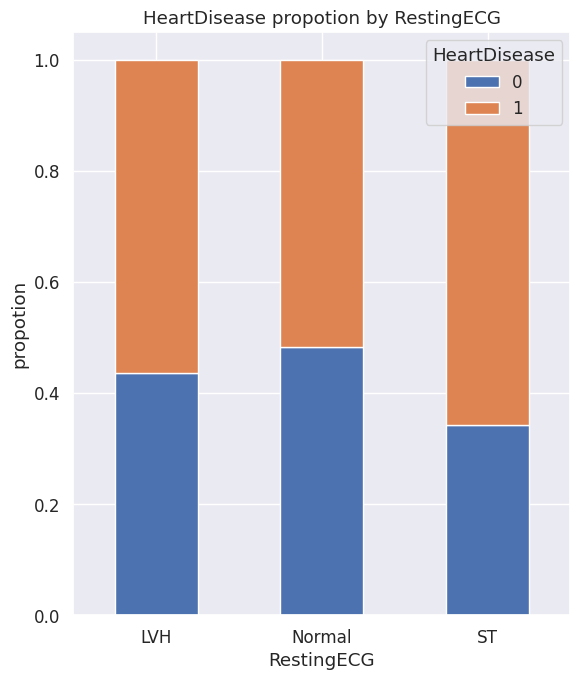

HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


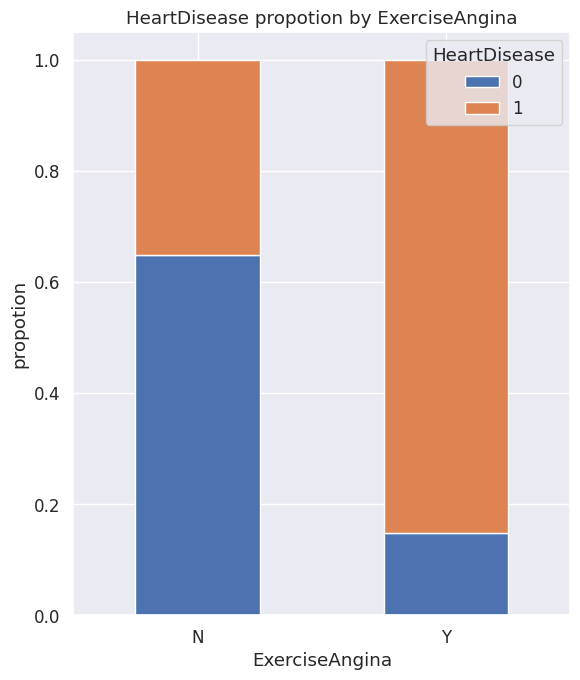

HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


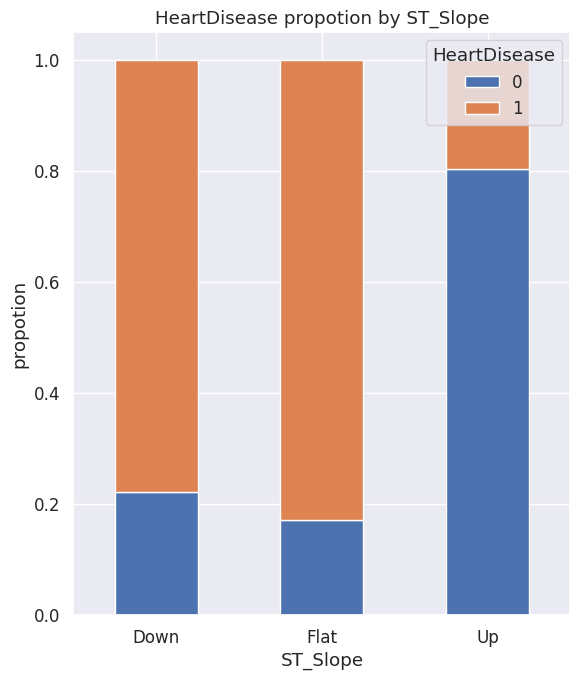

In [118]:
# Categorical Feature vs Target
for c in cetagorical_col:
  ct = pd.crosstab(df[c],df[target_col],normalize='index')
  display(ct)

  ct.plot(kind='bar',stacked=True,figsize=(6,7))
  plt.title(f'HeartDisease propotion by {c}')
  plt.ylabel('propotion')
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()